---
# 1. Business Understanding

### Business Insights (COME BACK TO THIS)
- Dublin has the highest number of bakeries listed on Yelp, indicating strong competition and demand.
- Rating distribution suggests that most bakeries in Ireland receive positive reviews.
- GoldenPages data is more focused on basic business listings, whereas Yelp provides customer perception.

---

# 2. Data Mining Summary

### Read Further Analysis in DataMining.ipynb

The dataset used in this project was created through a web-scraping process implemented in the accompanying `DataMining.ipynb` notebook. Two online sources were scraped: GoldenPages.ie (business listings) and Yelp.ie (customer review data). Selenium and BeautifulSoup were used to automate browser navigation, paginate through search results, and extract structured information such as business names, addresses, phone numbers, ratings, reviews, categories, and descriptions.

The full scraping process, including technical challenges, limitations, and justification of methods, is documented in more detail in `DataMining.ipynb`. The final combined dataset contained approx 1,091 unique bakery listings and is stored in `dataProject.csv` for further cleaning and analysis.


---
# 3. Data Cleaning


In [2]:
import pandas as pd

df = pd.read_csv("../data/dataProject.csv")
df.head()

df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              1091 non-null   object 
 1   category_search     1071 non-null   object 
 2   name                1091 non-null   object 
 3   address             1071 non-null   object 
 4   phone               1066 non-null   object 
 5   category_from_page  1071 non-null   object 
 6   summary             397 non-null    object 
 7   region              20 non-null     object 
 8   rating_raw          20 non-null     float64
 9   review_count_raw    20 non-null     object 
 10  location            20 non-null     object 
 11  price_range         18 non-null     object 
 12  categories          20 non-null     object 
 13  snippet             20 non-null     object 
dtypes: float64(1), object(13)
memory usage: 119.5+ KB


source                   0
category_search         20
name                     0
address                 20
phone                   25
category_from_page      20
summary                694
region                1071
rating_raw            1071
review_count_raw      1071
location              1071
price_range           1073
categories            1071
snippet               1071
dtype: int64

### Data Quality Summary

The combined dataset contains 1,091 rows and 14 columns. These rows come from two different sources (GoldenPages and Yelp), each providing different types of information. Because of this, the pattern of missing values is expected and consistent with the nature of each source.

**GoldenPages rows**
GoldenPages listings include:
- business name
- category used in the search
- address
- phone number
- short business summary (when available)

They **do not contain**:
- ratings
- review counts
- price range
- categories list
- customer review snippets
- region

This explains why these columns show a large number of missing values (around ~1070 missing entries each).

**Yelp rows**
Yelp listings include:
- name
- rating
- review count
- location text
- price range
- category tags
- customer review snippet
- region label

They **do not contain**:
- phone number
- GoldenPages summary
- GoldenPages category info  

This explains why `phone`, `summary`, `category_search`, and `category_from_page` have missing values for most rows.

### Interpretation of Missing Values

The missing values are *not* data errors — they are a structural consequence of merging two datasets with different schemas. Each row contains only the attributes provided by its source.

- GoldenPages contributes **~1,071 rows**
- Yelp contributes **~20 rows** after deduplication
- Columns that belong only to one source appear as `NaN` for the other

This is expected behaviour in a multi-source scraping project, and the dataset is suitable for exploration and basic analysis.

---
# 4. Exploratory Data Analysis

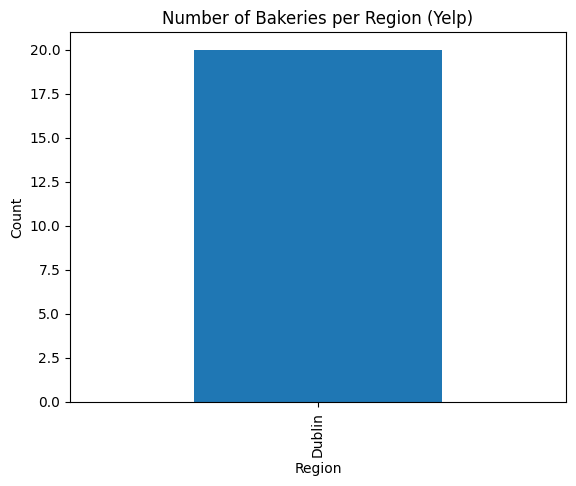

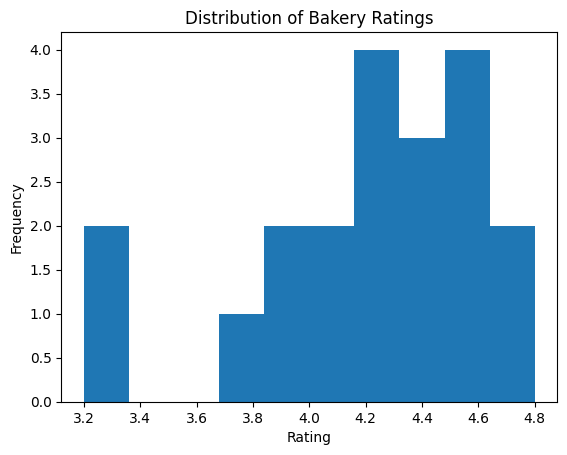

In [3]:
#Visualisation

import matplotlib.pyplot as plt

# Counting Bakeries by Region (YELP data only)
df[df['source']=="Yelp"]['region'].value_counts().plot(kind='bar')
plt.title("Number of Bakeries per Region (Yelp)")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# Ratings Distribution (also YELP data only)
df['rating_raw'] = pd.to_numeric(df['rating_raw'], errors='coerce')

df[df['source']=="Yelp"]['rating_raw'].plot(kind="hist", bins=10)
plt.title("Distribution of Bakery Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

---
# 5. Feature Engineering

---
# 6. Predictive Modelling

---
# 7. Findings and Conclusions